In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
from rdkit.Chem import rdMolDescriptors
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
# read contents of csv file
file = pd.read_csv("dataset_train.csv",header=None)
# adding header
headerList = ['SMILES', 'prop_1', 'prop_2','prop_3','prop_4']

# converting data frame to csv
file.to_csv("dataset_train2.csv", header=headerList, index=False)
data = pd.read_csv('dataset_train2.csv')

In [3]:
file.head()

,0,1,2,3,4
0,CC1=CCCCO1,0.9344,0.39370,-2.733458,6.5316
1,CC(=NN)N1CC1,1.1205,0.36672,-2.379820,6.0081
2,NN1C=CCC1=O,4.6177,0.35704,-2.109228,5.4297
3,OC(=O)C(=O)C=C,1.0933,0.31060,-1.917474,3.1556
4,Nc1nc(F)co1,3.3212,0.36979,-1.686293,6.2206


In [4]:
data.head()

,SMILES,prop_1,prop_2,prop_3,prop_4
0,CC1=CCCCO1,0.9344,0.39370,-2.733458,6.5316
1,CC(=NN)N1CC1,1.1205,0.36672,-2.379820,6.0081
2,NN1C=CCC1=O,4.6177,0.35704,-2.109228,5.4297
3,OC(=O)C(=O)C=C,1.0933,0.31060,-1.917474,3.1556
4,Nc1nc(F)co1,3.3212,0.36979,-1.686293,6.2206


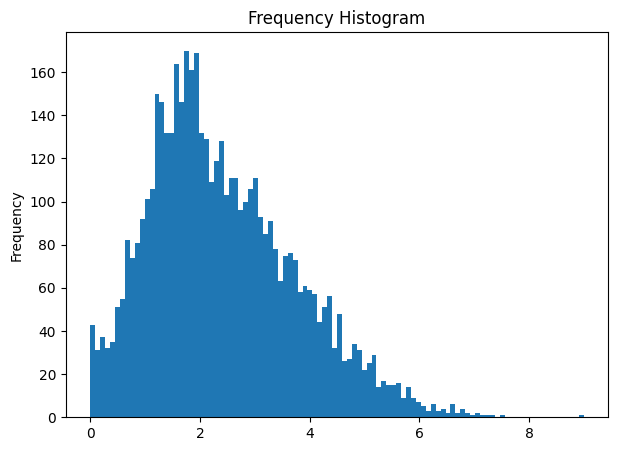

In [5]:

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = data["prop_1"]
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

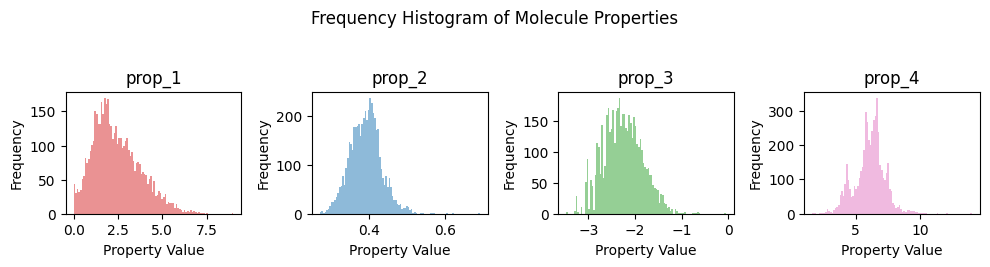

In [6]:
# Plotting the frequency distribution of the molecular properties
fig, axes = plt.subplots(1, 4, figsize=(10,2.5), dpi=100, sharex=False, sharey=False)
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:pink']

columns = ['prop_1', 'prop_2','prop_3','prop_4']

for i, (ax, col) in enumerate(zip(axes.flatten(), columns)):
    x = data[col]
    ax.hist(x, alpha=0.5, bins=100, density=False, stacked=False, label=str(col), color=colors[i])
    ax.set_title(col)
    ax.set_xlabel('Property Value')
    ax.set_ylabel('Frequency')

plt.suptitle('Frequency Histogram of Molecule Properties', y=1.05, size=12)

# ax.set_xlim(50, 70); ax.set_ylim(0, 1);
plt.tight_layout()

In [7]:
descriptor_names = list(rdMolDescriptors.Properties.GetAvailableProperties())
get_descriptors = rdMolDescriptors.Properties(descriptor_names)

In [8]:
print(descriptor_names)
len(descriptor_names)
type(descriptor_names)

['exactmw', 'amw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms', 'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3', 'NumRings', 'NumAromaticRings', 'NumAliphaticRings', 'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles', 'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms', 'NumBridgeheadAtoms', 'NumAtomStereoCenters', 'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP', 'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n', 'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2', 'kappa3', 'Phi']


list

In [9]:
def smi_to_descriptors(smile):
    mol = Chem.MolFromSmiles(smile)
    descriptors = []
    if mol:
        descriptors = np.array(get_descriptors.ComputeProperties(mol))
    return descriptors

In [10]:
descriptor_val = data.SMILES.apply(smi_to_descriptors)

In [11]:
print(descriptor_val)

0       [98.07316494, 98.14500000000001, 1.0, 0.0, 0.0...
1       [99.07964728799999, 99.137, 3.0, 2.0, 0.0, 1.0...
2       [98.048012812, 98.105, 3.0, 2.0, 0.0, 1.0, 2.0...
3       [100.01604398799999, 100.073, 3.0, 1.0, 2.0, 1...
4       [102.022940936, 102.06799999999998, 3.0, 2.0, ...
                              ...                        
4995    [103.07972754, 103.14000000000001, 1.0, 2.0, 3...
4996    [100.07489625599999, 100.12500000000001, 4.0, ...
4997    [97.06399722399999, 97.121, 3.0, 1.0, 0.0, 1.0...
4998    [98.08439831999999, 98.149, 2.0, 0.0, 0.0, 0.0...
4999    [101.064077476, 101.124, 1.0, 0.0, 0.0, 0.0, 1...
Name: SMILES, Length: 5000, dtype: object


In [12]:
des_val_df = descriptor_val.to_frame()
des_val_df.head()

,SMILES
0,"[98.07316494, 98.14500000000001, 1.0, 0.0, 0.0..."
1,"[99.07964728799999, 99.137, 3.0, 2.0, 0.0, 1.0..."
2,"[98.048012812, 98.105, 3.0, 2.0, 0.0, 1.0, 2.0..."
3,"[100.01604398799999, 100.073, 3.0, 1.0, 2.0, 1..."
4,"[102.022940936, 102.06799999999998, 3.0, 2.0, ..."


In [13]:
desc_df = pd.DataFrame(des_val_df['SMILES'].to_list(), columns=descriptor_names)
desc_df.head()

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,98.073165,98.145,1.0,0.0,0.0,0.0,1.0,7.0,17.0,1.0,...,4.606919,2.689723,1.109990,1.109990,0.680741,-0.46,4.692905,2.008532,1.221163,1.346550
1,99.079647,99.137,3.0,2.0,0.0,1.0,2.0,7.0,16.0,3.0,...,4.385991,2.337868,1.091697,1.091697,0.455256,-0.73,4.429490,1.404932,0.823939,0.889019
2,98.048013,98.105,3.0,2.0,0.0,1.0,2.0,7.0,13.0,3.0,...,3.794619,2.039264,0.846466,0.846466,0.455627,-0.83,4.332075,1.346848,0.617832,0.833521
3,100.016044,100.073,3.0,1.0,2.0,1.0,2.0,7.0,11.0,3.0,...,3.548167,1.578779,0.396181,0.396181,0.087310,-1.12,5.880000,2.124852,1.699672,1.784875
4,102.022941,102.068,3.0,2.0,0.0,1.0,3.0,7.0,10.0,4.0,...,3.388127,1.653373,0.493920,0.493920,0.266971,-1.06,4.108350,1.216406,0.677299,0.713917


In [14]:
data.head()

,SMILES,prop_1,prop_2,prop_3,prop_4
0,CC1=CCCCO1,0.9344,0.39370,-2.733458,6.5316
1,CC(=NN)N1CC1,1.1205,0.36672,-2.379820,6.0081
2,NN1C=CCC1=O,4.6177,0.35704,-2.109228,5.4297
3,OC(=O)C(=O)C=C,1.0933,0.31060,-1.917474,3.1556
4,Nc1nc(F)co1,3.3212,0.36979,-1.686293,6.2206


In [15]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [16]:
df_lipinski = lipinski(data.SMILES)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,98.145,1.70060,0.0,1.0
1,99.137,-0.40590,1.0,2.0
2,98.105,-0.39390,1.0,2.0
3,100.073,-0.17390,1.0,2.0
4,102.068,0.39590,1.0,3.0
...,...,...,...,...
4995,103.140,0.86090,1.0,1.0
4996,100.125,-0.58126,3.0,2.0
4997,97.121,-0.00620,1.0,3.0
4998,98.149,0.35020,0.0,2.0


In [17]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [18]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.


In [19]:
def regression_model(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
    np.random.seed(200)
    model = RandomForestRegressor(n_estimators=150)
    model.fit(X_train, Y_train)
    r2 = model.score(X_test, Y_test)
    return(model,r2,X_test,Y_test)

In [20]:

# X_1 = df_combined_prop_1.drop('prop_1',axis=1)
# X = df_lipinski 
prop = 'prop_1'
X = desc_df
Y = data[prop]
model, r2, X_test,Y_test = regression_model(X,Y)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=1)
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [22]:
np.random.seed(200)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train_std, Y_train)
r2 = model.score(X_test_std, Y_test)
r2

0.46056284858530483

In [23]:
Y_predict = model.predict(X_test)
r2

0.46056284858530483

In [24]:
''' Making an ANN to predict the properties'''
from sklearn.preprocessing import MinMaxScaler
# separately scale the input and output variables
scale_x = MinMaxScaler()
x = scale_x.fit_transform(X_train)
scale_y = MinMaxScaler()
Y_train_arr = Y_train.to_numpy()
Y_train_arr_1 = Y_train_arr.reshape(-1, 1)
y = scale_y.fit_transform(Y_train_arr_1)
print(x.min(), x.max(), y.min(), y.max())

0.0 1.0 0.0 1.0


In [31]:
x_test = scale_x.transform(X_test)

In [26]:
pip install tensorflow


     ------------------------------------ 266.3/266.3 MB 617.9 kB/s eta 0:00:00
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached libclang-15.0.6.1-py2.py3-none-win_amd64.whl (23.2 MB)
     ---------------------------------------- 3.7/3.7 MB 668.8 kB/s eta 0:00:00
     ------------------------------------ 895.7/895.7 kB 726.3 kB/s eta 0:00:00
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
     ---------------------------------------- 1.5/1.5 MB 726.8 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     ---------------------------------------- 2.6/2.6 MB 722.6 kB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
from keras.models import Sequential
from keras.layers import Dense
# design the neural network model
model = Sequential()
model.add(Dense(10, input_dim=43, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1))

In [30]:
# define the loss function and optimization algorithm
model.compile(loss='mse', optimizer='adam')
# ft the model on the training dataset
model.fit(x, y, epochs=500, batch_size=10, verbose=0)

In [32]:
# make predictions for the input data
yhat = model.predict(x_test)

32/32 [==============================] - 0s 2ms/step


In [33]:
# inverse transforms
# x_plot = scale_x.inverse_transform(x)
# y_plot = scale_y.inverse_transform(y)
yhat_plot = scale_y.inverse_transform(yhat)

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, yhat_plot)

29.23250524964966

In [49]:
type(Y_test.to_numpy())
Y_test_arr = Y_test.to_numpy()
min = yhat_plot.min()
min_index = yhat_plot.argmin()
print(min_index)

214


In [50]:
new_yhat_plot = np.delete(yhat_plot, min_index)
new_Y_test = np.delete(Y_test_arr, min_index )

In [53]:
mse =mean_squared_error(new_Y_test, new_yhat_plot)
mse

0.9260121829811649

In [55]:
r_2 = 1 -(mse/np.var(new_Y_test))
r_2

0.4722513467786431

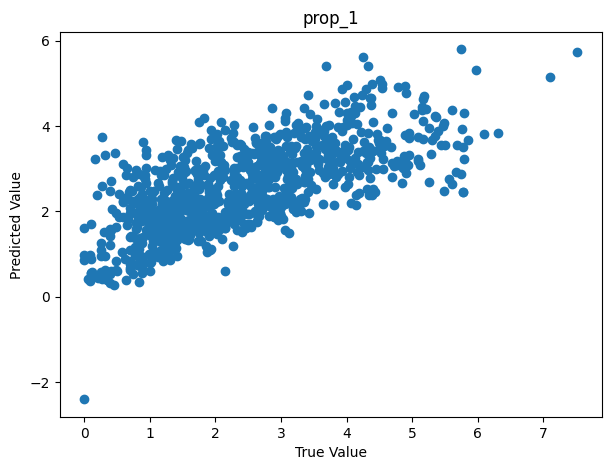

In [51]:
plt.scatter(new_Y_test,new_yhat_plot)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title(prop)
plt.show()

In [56]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# Define SMILES string
smiles_string = "CCOc1ccc2nc(S(N)(=O)=O)sc2c1"

# Convert SMILES to RDKit Mol object
mol = Chem.MolFromSmiles(smiles_string)

# Generate molecular graph using RDKit
adj_mat = Chem.GetAdjacencyMatrix(mol)
mol_graph = AllChem.GetMolFromSmiles(smiles_string)
mol_graph = AllChem.AddHs(mol_graph)
AllChem.EmbedMolecule(mol_graph)
AllChem.MMFFOptimizeMolecule(mol_graph)

# Encode molecular graph using RDKit
atom_features = np.array([list(atom.GetPropsAsDict().values()) for atom in mol_graph.GetAtoms()])
edge_features = np.array([list(bond.GetPropsAsDict().values()) for bond in mol_graph.GetBonds()])
adj_mat = Chem.GetAdjacencyMatrix(mol_graph)
mol_vec = np.concatenate((atom_features, edge_features, adj_mat), axis=1)

# Print encoded vector
print(mol_vec)


AttributeError: module 'rdkit.Chem.AllChem' has no attribute 'GetMolFromSmiles'

In [79]:
# Serialize and save model to disk
filename = 'model_'+prop+'.joblib'
joblib.dump(model, filename)


['model_prop_3.joblib']

In [83]:
# Load model from disk
load_filename = 'model_'+ prop+'.joblib'
loaded_model = joblib.load(load_filename)

In [84]:
Y_predict_load = loaded_model.predict(X_test)

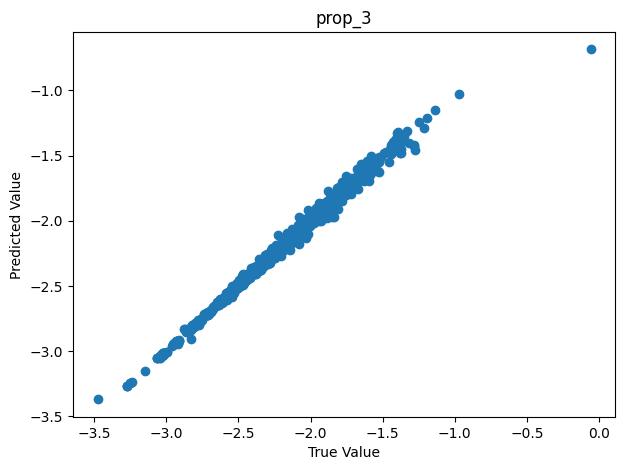

In [85]:
plt.scatter(Y_test,Y_predict_load)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title(prop)
plt.show()

In [92]:
SMILES_test_data = pd.read_csv('molecule.smi',header=None)
SMILES_test_data

,0
0,CC(=NN)N1CC1
1,NN1C=CCC1=O
2,OC(=O)C(=O)C=C
3,Nc1nc(F)co1
4,CN(C)C(C)=NO
...,...
4994,NCC=CCCF
4995,CN(C=N)C(N)=N
4996,C1CC=NN=CN1
4997,CN1CCCN=C1


In [94]:
test_desc_val = SMILES_test_data[0].apply(smi_to_descriptors)
test_desc_val.head()

0    [99.07964728799999, 99.137, 3.0, 2.0, 0.0, 1.0...
1    [98.048012812, 98.105, 3.0, 2.0, 0.0, 1.0, 2.0...
2    [100.01604398799999, 100.073, 3.0, 1.0, 2.0, 1...
3    [102.022940936, 102.06799999999998, 3.0, 2.0, ...
4    [102.07931294, 102.13699999999999, 3.0, 1.0, 0...
Name: 0, dtype: object

In [96]:
test_des_val_df = test_desc_val.to_frame()
test_des_val_df.head()

,0
0,"[99.07964728799999, 99.137, 3.0, 2.0, 0.0, 1.0..."
1,"[98.048012812, 98.105, 3.0, 2.0, 0.0, 1.0, 2.0..."
2,"[100.01604398799999, 100.073, 3.0, 1.0, 2.0, 1..."
3,"[102.022940936, 102.06799999999998, 3.0, 2.0, ..."
4,"[102.07931294, 102.13699999999999, 3.0, 1.0, 0..."


In [98]:
test_desc_df = pd.DataFrame(test_des_val_df[0].to_list(), columns=descriptor_names)
test_desc_df.head()

,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,...,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,99.08,99.14,3.00,2.00,0.00,1.00,2.00,7.00,16.00,3.00,...,4.39,2.34,1.09,1.09,0.46,-0.73,4.43,1.40,0.82,0.89
1,98.05,98.11,3.00,2.00,0.00,1.00,2.00,7.00,13.00,3.00,...,3.79,2.04,0.85,0.85,0.46,-0.83,4.33,1.35,0.62,0.83
2,100.02,100.07,3.00,1.00,2.00,1.00,2.00,7.00,11.00,3.00,...,3.55,1.58,0.40,0.40,0.09,-1.12,5.88,2.12,1.70,1.78
3,102.02,102.07,3.00,2.00,0.00,1.00,3.00,7.00,10.00,4.00,...,3.39,1.65,0.49,0.49,0.27,-1.06,4.11,1.22,0.68,0.71
4,102.08,102.14,3.00,1.00,0.00,1.00,2.00,7.00,17.00,3.00,...,4.84,2.04,0.79,0.79,0.09,-0.73,6.27,2.44,2.03,2.19


In [107]:
'A function to read and convert .smi files to a dataframe'

def smi_to_df(smi_filename):
    SMILES_test_data = pd.read_csv(smi_filename,header=None)
    desc_val = SMILES_test_data[0].apply(smi_to_descriptors)
    des_val_df = desc_val.to_frame()
    desc_df = pd.DataFrame(des_val_df[0].to_list(), columns=descriptor_names)
    return(desc_df)


In [108]:
X_test_dataset = smi_to_df('molecule.smi')


In [112]:
Y_predict_test = loaded_model.predict(X_test_dataset)
Y_predict_test

array([-2.40694669, -2.11895075, -1.89861948, ..., -2.19249365,
       -2.63010167, -2.35080286])

In [ ]:
SAVE_regressor_list = lazypredict.Supervised.REGRESSORS

In [ ]:
lazypredict.Supervised.REGRESSORS = SAVE_regressor_list

In [21]:
# lazypredict.Supervised.REGRESSORS = lazypredict.Supervised.REGRESSORS [:]
lazypredict.Supervised.REGRESSORS 


[('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('DecisionTreeRegressor', sklearn.tree._classes.DecisionTreeRegressor),
 ('DummyRegressor', sklearn.dummy.DummyRegressor),
 ('ElasticNet', sklearn.linear_model._coordinate_descent.ElasticNet),
 ('ElasticNetCV', sklearn.linear_model._coordinate_descent.ElasticNetCV),
 ('ExtraTreeRegressor', sklearn.tree._classes.ExtraTreeRegressor),
 ('ExtraTreesRegressor', sklearn.ensemble._forest.ExtraTreesRegressor),
 ('GammaRegressor', sklearn.linear_model._glm.glm.GammaRegressor),
 ('GaussianProcessRegressor',
  sklearn.gaussian_process._gpr.GaussianProcessRegressor),
 ('GradientBoostingRegressor', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('HistGradientBoostingRegressor',
  sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingRegressor),
 ('HuberRegressor', sk

In [22]:
# Defines and builds the lazyclassifier
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = reg.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = reg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 41/41 [00:48<00:00,  1.17s/it]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 41/41 [00:48<00:00,  1.19s/it]


In [23]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreeRegressor,1.00,1.00,0.00,0.07
DecisionTreeRegressor,1.00,1.00,0.00,0.17
ExtraTreesRegressor,1.00,1.00,0.00,4.18
GaussianProcessRegressor,1.00,1.00,0.00,4.95
XGBRegressor,0.93,0.93,0.36,1.21
RandomForestRegressor,0.92,0.93,0.36,12.89
BaggingRegressor,0.90,0.90,0.42,1.55
LGBMRegressor,0.76,0.77,0.64,0.43
HistGradientBoostingRegressor,0.76,0.77,0.64,1.62


In [24]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.45,0.47,0.98,3.43
LGBMRegressor,0.45,0.47,0.98,0.38
RandomForestRegressor,0.43,0.45,1.00,13.56
SVR,0.41,0.43,1.02,1.84
NuSVR,0.40,0.42,1.02,1.74
ExtraTreesRegressor,0.39,0.41,1.03,4.05
GradientBoostingRegressor,0.39,0.41,1.04,4.79
BaggingRegressor,0.37,0.39,1.05,1.36
XGBRegressor,0.36,0.39,1.06,1.03


In [8]:
from padelpy import from_smiles
SMILES  = data['SMILES'].tolist()
descriptors = from_smiles(SMILES, fingerprints=True)

PermissionError: [WinError 32] The process cannot access the file because it is being used by another process: '20230310222051233.smi'